In [199]:
#Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [200]:
#Storing the csvpaths
csvpath_confirmed="time_series_19-covid-Confirmed.csv"
csvpath_deaths="time_series_19-covid-Deaths.csv"
csvpath_recovered="time_series_19-covid-Recovered.csv"

In [201]:
#Reading into a pandas DataFrame
Confirmed_df1=pd.read_csv(csvpath_confirmed)
Deaths_df1=pd.read_csv(csvpath_deaths)
Recovered_df1=pd.read_csv(csvpath_recovered)

In [202]:
#Manipulating the Confirmed dataframe
#Dropping the colums which are not required
Confirmed_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)


In [203]:
#Filling NaN with a 0 for calculations
Confirmed_df1=Confirmed_df1.fillna(0)
Confirmed_df1.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,43,47,48,50,50,50,53,59,70,75
1,Japan,2,1,2,2,4,4,7,7,11,...,331,360,420,461,502,511,581,639,639,701
2,Singapore,0,1,3,3,4,5,7,7,10,...,110,117,130,138,150,150,160,178,178,200
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,...,50,50,83,93,99,117,129,149,149,197


In [204]:
#Grouping the Confirmed cases dataframe by Country/Region
Confirmed_group=Confirmed_df1.groupby(["Country/Region"])
#Creating the final Confirmed dataframe to be used further
Confirmed_final=Confirmed_group.sum()

#Manipulating the Deaths dataframe
#Dropping the colums which are not required
Deaths_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)
#Filling NaN with a 0 for calculations
Deaths_df1=Deaths_df1.fillna(0)
#Grouping the Death cases dataframe by Country/Region
Deaths_group=Deaths_df1.groupby(["Country/Region"])
#Creating the final Death dataframe to be used further
Deaths_final=Deaths_group.sum()

Recovered_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)
Recovered_df1=Recovered_df1.fillna(0)
Recovered_group=Recovered_df1.groupby(["Country/Region"])
Recovered_final=Recovered_group.sum()
#len(Confirmed_final)

In [205]:
Recovered_final.head()
#len(Recovered_final)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
china_df=pd.DataFrame({"Dates":Confirmed_final.loc["China",:].index.tolist(),\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["China",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["China",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["China",:].tolist()})
china_df.head()

,Dates,#Cumulative Confirmed Cases,#Cumulative Death Cases,#Cumulative Recovered Cases
0,1/22/20,548,17,28
1,1/23/20,643,18,30
2,1/24/20,920,26,36
3,1/25/20,1406,42,39
4,1/26/20,2075,56,49


In [207]:
US_df=pd.DataFrame({"Dates":Confirmed_final.loc["US",:].index.tolist(),\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["US",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["US",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["US",:].tolist()})
US_df.head()

,Dates,#Cumulative Confirmed Cases,#Cumulative Death Cases,#Cumulative Recovered Cases
0,1/22/20,1,0,0
1,1/23/20,1,0,0
2,1/24/20,2,0,0
3,1/25/20,2,0,0
4,1/26/20,5,0,0


In [208]:
canada_df=pd.DataFrame({"Dates":Confirmed_final.loc["Canada",:].index.tolist(),\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Canada",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Canada",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Canada",:].tolist()})
canada_df.head()

,Dates,#Cumulative Confirmed Cases,#Cumulative Death Cases,#Cumulative Recovered Cases
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,1,0,0


In [225]:
southKorea_df=pd.DataFrame({"Dates":Confirmed_final.loc["Korea, South",:].index.tolist(),\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Korea, South",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Korea, South",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Korea, South",:].tolist()})
southKorea_df.tail()

,Dates,#Cumulative Confirmed Cases,#Cumulative Death Cases,#Cumulative Recovered Cases
47,3/9/20,7478,53,118
48,3/10/20,7513,54,247
49,3/11/20,7755,60,288
50,3/12/20,7869,66,333
51,3/13/20,7979,66,510


In [210]:
singapore_df=pd.DataFrame({"Dates":Confirmed_final.loc["Singapore",:].index.tolist(),\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Singapore",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Singapore",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Singapore",:].tolist()})
singapore_df.tail()

,Dates,#Cumulative Confirmed Cases,#Cumulative Death Cases,#Cumulative Recovered Cases
47,3/9/20,150,0,78
48,3/10/20,160,0,78
49,3/11/20,178,0,96
50,3/12/20,178,0,96
51,3/13/20,200,0,97


In [211]:
italy_df=pd.DataFrame({"Dates":Confirmed_final.loc["Italy",:].index.tolist(),\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Italy",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Italy",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Italy",:].tolist()})
italy_df.tail()

,Dates,#Cumulative Confirmed Cases,#Cumulative Death Cases,#Cumulative Recovered Cases
47,3/9/20,9172,463,724
48,3/10/20,10149,631,724
49,3/11/20,12462,827,1045
50,3/12/20,12462,827,1045
51,3/13/20,17660,1266,1439


In [212]:
iran_df=pd.DataFrame({"Dates":Confirmed_final.loc["Iran",:].index.tolist(),\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Iran",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Iran",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Iran",:].tolist()})
iran_df.tail()

,Dates,#Cumulative Confirmed Cases,#Cumulative Death Cases,#Cumulative Recovered Cases
47,3/9/20,7161,237,2394
48,3/10/20,8042,291,2731
49,3/11/20,9000,354,2959
50,3/12/20,10075,429,2959
51,3/13/20,11364,514,2959


In [252]:
japan_df=pd.DataFrame({"Dates":Confirmed_final.loc["Japan",:].index.tolist(),\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Japan",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Japan",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Japan",:].tolist()})
japan_df.head()

,Dates,#Cumulative Confirmed Cases,#Cumulative Death Cases,#Cumulative Recovered Cases
0,1/22/20,2,0,0
1,1/23/20,1,0,0
2,1/24/20,2,0,0
3,1/25/20,2,0,0
4,1/26/20,4,0,1


In [250]:
### MERGED TOTAL COUNTS
###
###
confirmed_total_china=china_df.loc[len(china_df)-1,"#Cumulative Confirmed Cases"]
#confirmed_total_china
death_total_china=china_df.loc[len(china_df)-1,"#Cumulative Death Cases"]
#death_total_china
recovered_total_china=china_df.loc[len(china_df)-1,"#Cumulative Recovered Cases"]
#recovered_total_china

confirmed_total_canada=canada_df.loc[len(canada_df)-1,"#Cumulative Confirmed Cases"]
death_total_canada=canada_df.loc[len(canada_df)-1,"#Cumulative Death Cases"]
recovered_total_canada=canada_df.loc[len(canada_df)-1,"#Cumulative Recovered Cases"]

confirmed_total_iran=southKorea_df.loc[len(iran_df)-1,"#Cumulative Confirmed Cases"]
death_total_iran=southKorea_df.loc[len(iran_df)-1,"#Cumulative Death Cases"]
recovered_total_iran=southKorea_df.loc[len(iran_df)-1,"#Cumulative Recovered Cases"]

confirmed_total_italy=italy_df.loc[len(italy_df)-1,"#Cumulative Confirmed Cases"]
death_total_italy=italy_df.loc[len(italy_df)-1,"#Cumulative Death Cases"]
recovered_total_italy=italy_df.loc[len(italy_df)-1,"#Cumulative Recovered Cases"]

confirmed_total_singapore=singapore_df.loc[len(singapore_df)-1,"#Cumulative Confirmed Cases"]
death_total_singapore=singapore_df.loc[len(singapore_df)-1,"#Cumulative Death Cases"]
recovered_total_singapore=singapore_df.loc[len(singapore_df)-1,"#Cumulative Recovered Cases"]

confirmed_total_southKorea=southKorea_df.loc[len(southKorea_df)-1,"#Cumulative Confirmed Cases"]
death_total_southKorea=southKorea_df.loc[len(southKorea_df)-1,"#Cumulative Death Cases"]
recovered_total_southKorea=southKorea_df.loc[len(southKorea_df)-1,"#Cumulative Recovered Cases"]

confirmed_total_US=US_df.loc[len(US_df)-1,"#Cumulative Confirmed Cases"]
death_total_US=US_df.loc[len(US_df)-1,"#Cumulative Death Cases"]
recovered_total_US=US_df.loc[len(US_df)-1,"#Cumulative Recovered Cases"]

confirmed_total_japan=japan_df.loc[len(japan_df)-1,"#Cumulative Confirmed Cases"]
death_total_japan=japan_df.loc[len(japan_df)-1,"#Cumulative Death Cases"]
recovered_total_japan=japan_df.loc[len(japan_df)-1,"#Cumulative Recovered Cases"]



### TOTAL POPULATIONS
###
###
total_population_china = 1437677020
total_population_southKorea = 51269185 
total_population_singapore=5836884
total_population_italy = 60550075
total_population_iran = 82913906
total_population_US = 330425304 
total_population_canada = 37643160 
total_population_japan = 126150000

### LENGTH COUNT
###
###
total_days_china = len(china_df)
total_days_singapore = len(singapore_df)
total_days_southKorea = len(southKorea_df)
total_days_iran = len(iran_df)
total_days_italy = len(italy_df)
total_days_US = len(US_df)
total_days_canada = len(canada_df)
total_days_japan = len(japan_df)

In [251]:
### PERCENTAGE OF ITEMS AND INFECTION RATE EQUATIONS
###
###

#% of Death=Total Death/Total confirmed *100
#% of Recovered=Total Recovered/Total confirmed *100
#Infection rate=Total confirmed/Total population *100
#Speed of Infection=Total Confirmed/Total days
percentage_death_china = round((death_total_china/confirmed_total_china)*100,2)
#percentage_death_china
percentage_recovered_china = round((recovered_total_china/confirmed_total_china)*100,2)
#percentage_recovered_china
infection_rate_china = round((confirmed_total_china/total_population_china)*100,5)
#infection_rate_china
speed_infection_china = round((confirmed_total_china/total_days_china),1)
day_0_china = len(china_df['Dates'])-(len(china_df['Dates'])-len(china_df[china_df['#Cumulative Confirmed Cases']==0]))
#day0

percentage_death_singapore = round((death_total_singapore/confirmed_total_singapore)*100,2)
percentage_recovered_singapore = round((recovered_total_singapore/confirmed_total_singapore)*100,2)
infection_rate_singapore = round((confirmed_total_singapore/total_population_singapore)*100,5)
speed_infection_singapore = round((confirmed_total_singapore/total_days_singapore),1)
day_0_singapore = len(singapore_df['Dates'])-(len(singapore_df['Dates'])-len(singapore_df[singapore_df['#Cumulative Confirmed Cases']==0]))
#day1

percentage_death_southKorea = round((death_total_southKorea/confirmed_total_southKorea)*100,2)
percentage_recovered_southKorea = round((recovered_total_southKorea/confirmed_total_southKorea)*100,2)
infection_rate_southKorea = round((confirmed_total_southKorea/total_population_southKorea)*100,5)
speed_infection_southKorea = round((confirmed_total_southKorea/total_days_southKorea),1)
day_0_southKorea = len(southKorea_df['Dates'])-(len(southKorea_df['Dates'])-len(southKorea_df[southKorea_df['#Cumulative Confirmed Cases']==0]))
#day0

percentage_death_italy = round((death_total_italy/confirmed_total_italy)*100,2)
percentage_recovered_italy = round((recovered_total_italy/confirmed_total_italy)*100,2)
infection_rate_italy = round((confirmed_total_italy/total_population_italy)*100,5)
speed_infection_italy = round((confirmed_total_italy/total_days_italy),1)
day_0_italy = len(italy_df['Dates'])-(len(italy_df['Dates'])-len(italy_df[italy_df['#Cumulative Confirmed Cases']==0]))
#day9

percentage_death_iran = round((death_total_iran/confirmed_total_iran)*100,2)
percentage_recovered_iran = round((recovered_total_iran/confirmed_total_iran)*100,2)
infection_rate_iran = round((confirmed_total_iran/total_population_iran)*100,5)
speed_infection_iran = round((confirmed_total_iran/total_days_iran),1)
day_0_iran = len(iran_df['Dates'])-(len(iran_df['Dates'])-len(iran_df[iran_df['#Cumulative Confirmed Cases']==0]))
#day 28

percentage_death_US = round((death_total_US/confirmed_total_US)*100,2)
percentage_recovered_US = round((recovered_total_US/confirmed_total_US)*100,2)
infection_rate_US = round((confirmed_total_US/total_population_US)*100,5)
speed_infection_US = round((confirmed_total_US/total_days_US),1)
day_0_US = len(US_df['Dates'])-(len(US_df['Dates'])-len(US_df[US_df['#Cumulative Confirmed Cases']==0]))
#day0

percentage_death_canada = round((death_total_canada/confirmed_total_canada)*100,2)
percentage_recovered_canada = round((recovered_total_canada/confirmed_total_canada)*100,2)
infection_rate_canada = round((confirmed_total_canada/total_population_canada)*100,5)
speed_infection_canada = round((confirmed_total_canada/total_days_canada),1)
day_0_canada = len(canada_df['Dates'])-(len(canada_df['Dates'])-len(canada_df[canada_df['#Cumulative Confirmed Cases']==0]))
#day 4

percentage_death_japan = round((death_total_japan/confirmed_total_japan)*100,2)
percentage_recovered_japan = round((recovered_total_japan/confirmed_total_japan)*100,2)
infection_rate_japan = round((confirmed_total_japan/total_population_japan)*100,5)
speed_infection_japan = round((confirmed_total_japan/total_days_japan),1)
day_0_japan = len(japan_df['Dates'])-(len(japan_df['Dates'])-len(japan_df[japan_df['#Cumulative Confirmed Cases']==0]))

day_0_japan

0

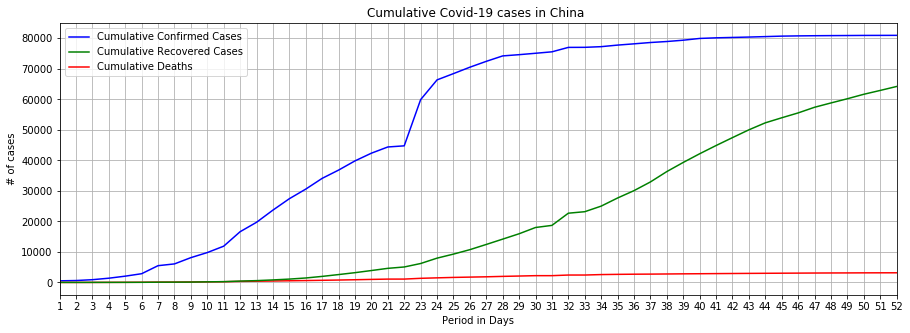

Everyday 1556.6 people got infected in from 22nd Jan 2020 to 13th March 2020.
The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was 0.00563.
3.93% population suffered death from 22nd Jan 2020 to 13th March 2020.
79.31% population recovered from 22nd Jan 2020 to 13th March 2020.


In [235]:
plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(china_df)+1)
tick_locations_china = []
for x in x_axis:
    tick_locations_china.append(x)
    
plt.title("Cumulative Covid-19 cases in China ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
confirmed_cases_china, = plt.plot(x_axis, china_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases")
death_cases_china, = plt.plot(x_axis, china_df.loc[:,'#Cumulative Death Cases'], color="red", label="Cumulative Deaths")
recovered_cases_china, = plt.plot(x_axis, china_df.loc[:,'#Cumulative Recovered Cases'], color="green", label="Cumulative Recovered Cases")

plt.legend(handles=[confirmed_cases_china, recovered_cases_china, death_cases_china], loc="upper left")
plt.xticks(tick_locations_china)

plt.show()

print(f"Everyday {speed_infection_china} people got infected in from 22nd Jan 2020 to 13th March 2020.")
print(f"The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was {infection_rate_china}.")
print(f"{percentage_death_china}% population suffered death from 22nd Jan 2020 to 13th March 2020.")
print(f"{percentage_recovered_china}% population recovered from 22nd Jan 2020 to 13th March 2020.")

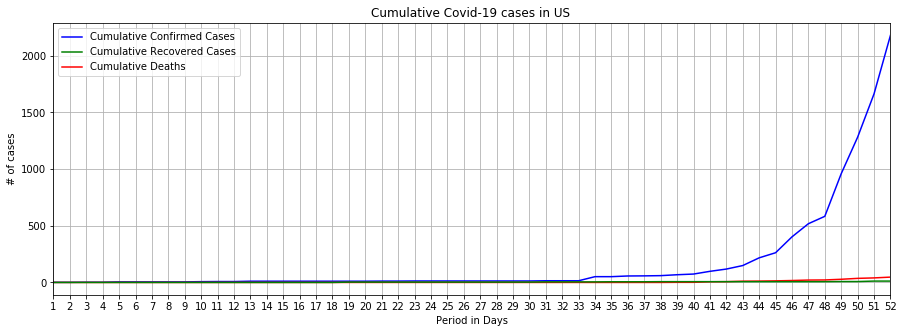

Everyday 41.9 people got infected from 22nd Jan 2020 to 13th March 2020.
The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was 0.00066.
2.16% population suffered death from 22nd Jan 2020 to 13th March 2020.
0.55% population recovered from 22nd Jan 2020 to 13th March 2020.


In [236]:
plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(US_df)+1)
tick_locations_US = []
for x in x_axis:
    tick_locations_US.append(x)
    
plt.title("Cumulative Covid-19 cases in US ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
confirmed_cases_US, = plt.plot(x_axis, US_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases")
death_cases_US, = plt.plot(x_axis, US_df.loc[:,'#Cumulative Death Cases'], color="red", label="Cumulative Deaths")
recovered_cases_US, = plt.plot(x_axis, US_df.loc[:,'#Cumulative Recovered Cases'], color="green", label="Cumulative Recovered Cases")

plt.legend(handles=[confirmed_cases_US, recovered_cases_US, death_cases_US], loc="upper left")
plt.xticks(tick_locations_US)

plt.show()

print(f"Everyday {speed_infection_US} people got infected from 22nd Jan 2020 to 13th March 2020.")
print(f"The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was {infection_rate_US}.")
print(f"{percentage_death_US}% population suffered death from 22nd Jan 2020 to 13th March 2020.")
print(f"{percentage_recovered_US}% population recovered from 22nd Jan 2020 to 13th March 2020.")

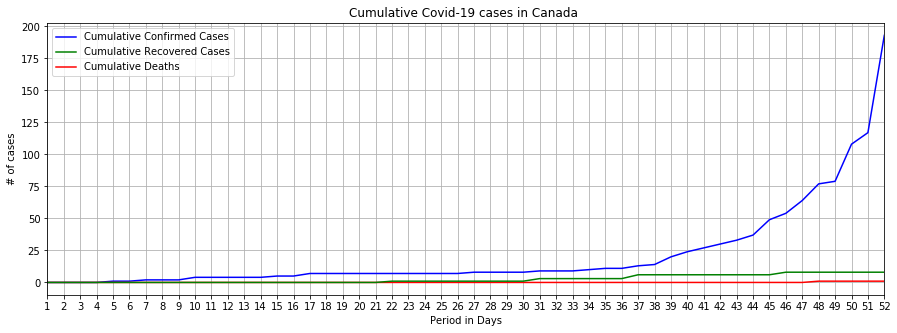

Everyday 3.7 people got infected from 22nd Jan 2020 to 13th March 2020.
The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was 0.00051.
0.52% population suffered death from 22nd Jan 2020 to 13th March 2020.
4.15% population recovered from 22nd Jan 2020 to 13th March 2020.


In [237]:
plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(canada_df)+1)
tick_locations_canada = []
for x in x_axis:
    tick_locations_canada.append(x)
    
plt.title("Cumulative Covid-19 cases in Canada ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
confirmed_cases_canada, = plt.plot(x_axis, canada_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases")
death_cases_canada, = plt.plot(x_axis, canada_df.loc[:,'#Cumulative Death Cases'], color="red", label="Cumulative Deaths")
recovered_cases_canada, = plt.plot(x_axis, canada_df.loc[:,'#Cumulative Recovered Cases'], color="green", label="Cumulative Recovered Cases")

plt.legend(handles=[confirmed_cases_canada, recovered_cases_canada, death_cases_canada], loc="upper left")
plt.xticks(tick_locations_canada)

plt.show()

print(f"Everyday {speed_infection_canada} people got infected from 22nd Jan 2020 to 13th March 2020.")
print(f"The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was {infection_rate_canada}.")
print(f"{percentage_death_canada}% population suffered death from 22nd Jan 2020 to 13th March 2020.")
print(f"{percentage_recovered_canada}% population recovered from 22nd Jan 2020 to 13th March 2020.")

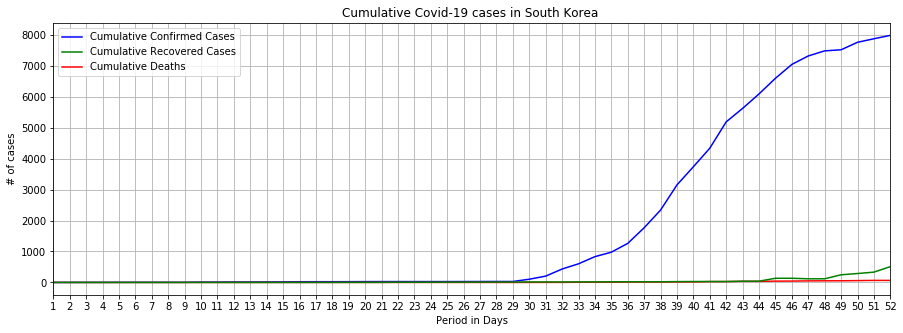

153.0 people per day got infected throughout 52 days.
The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was 0.01556.
0.83% population suffered death from 22nd Jan 2020 to 13th March 2020.
6.39% population recovered from 22nd Jan 2020 to 13th March 2020.


In [238]:
plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(southKorea_df)+1)
tick_locations_southKorea = []
for x in x_axis:
    tick_locations_southKorea.append(x)
    
plt.title("Cumulative Covid-19 cases in South Korea ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
confirmed_cases_southKorea, = plt.plot(x_axis, southKorea_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases")
death_cases_southKorea, = plt.plot(x_axis, southKorea_df.loc[:,'#Cumulative Death Cases'], color="red", label="Cumulative Deaths")
recovered_cases_southKorea, = plt.plot(x_axis, southKorea_df.loc[:,'#Cumulative Recovered Cases'], color="green", label="Cumulative Recovered Cases")

plt.legend(handles=[confirmed_cases_southKorea, recovered_cases_southKorea, death_cases_southKorea], loc="upper left")
plt.xticks(tick_locations_southKorea)

plt.show()

print(f"{round(speed_infection_southKorea,0)} people per day got infected throughout {total_days_southKorea} days.")
print(f"The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was {infection_rate_southKorea}.")
print(f"{percentage_death_southKorea}% population suffered death from 22nd Jan 2020 to 13th March 2020.")
print(f"{percentage_recovered_southKorea}% population recovered from 22nd Jan 2020 to 13th March 2020.")

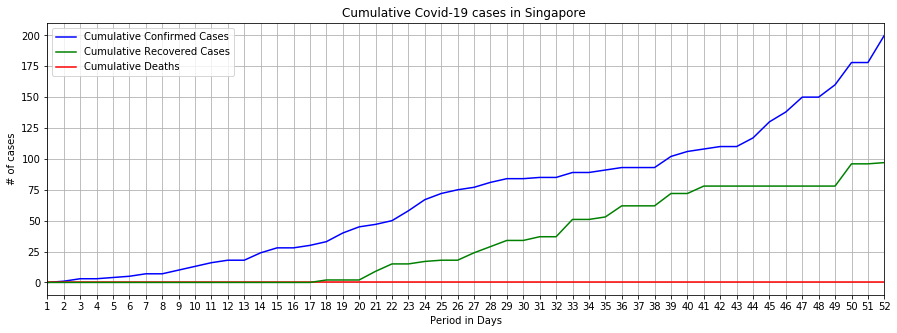

Everyday 3.8 people got infected in from 22nd Jan 2020 to 13th March 2020.
The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was 0.00343.
0.0% population suffered death from 22nd Jan 2020 to 13th March 2020.
48.5% population recovered from 22nd Jan 2020 to 13th March 2020.


In [239]:
plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(singapore_df)+1)
tick_locations_singapore = []
for x in x_axis:
    tick_locations_singapore.append(x)
    
plt.title("Cumulative Covid-19 cases in Singapore ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
confirmed_cases_singapore, = plt.plot(x_axis, singapore_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases")
death_cases_singapore, = plt.plot(x_axis, singapore_df.loc[:,'#Cumulative Death Cases'], color="red", label="Cumulative Deaths")
recovered_cases_singapore, = plt.plot(x_axis, singapore_df.loc[:,'#Cumulative Recovered Cases'], color="green", label="Cumulative Recovered Cases")

plt.legend(handles=[confirmed_cases_singapore, recovered_cases_singapore, death_cases_singapore], loc="upper left")
plt.xticks(tick_locations_singapore)

plt.show()

print(f"Everyday {speed_infection_singapore} people got infected in from 22nd Jan 2020 to 13th March 2020.")
print(f"The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was {infection_rate_singapore}.")
print(f"{percentage_death_singapore}% population suffered death from 22nd Jan 2020 to 13th March 2020.")
print(f"{percentage_recovered_singapore}% population recovered from 22nd Jan 2020 to 13th March 2020.")

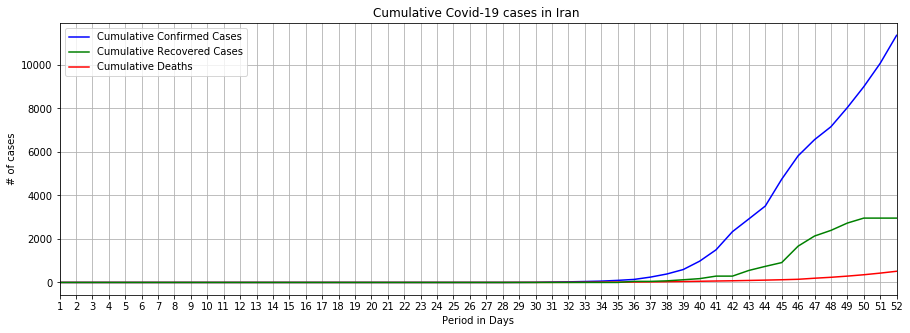

Everyday 153.4 people got infected from first confirmed case (19th Feb 2020) to 13th March 2020.
The rate at which the population got infected from first confirmed case (19th Feb 2020) to 13th March 2020 was 0.00962.
0.83% population suffered death from first confirmed case (19th Feb 2020) to 13th March 2020.
6.39% population recovered from first confirmed case (19th Feb 2020) to 13th March 2020.


In [240]:
plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(iran_df)+1)
tick_locations_iran = []
for x in x_axis:
    tick_locations_iran.append(x)
    
plt.title("Cumulative Covid-19 cases in Iran ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
confirmed_cases_iran, = plt.plot(x_axis, iran_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases")
death_cases_iran, = plt.plot(x_axis, iran_df.loc[:,'#Cumulative Death Cases'], color="red", label="Cumulative Deaths")
recovered_cases_iran, = plt.plot(x_axis, iran_df.loc[:,'#Cumulative Recovered Cases'], color="green", label="Cumulative Recovered Cases")

plt.legend(handles=[confirmed_cases_iran, recovered_cases_iran, death_cases_iran], loc="upper left")
plt.xticks(tick_locations_iran)

plt.show()

print(f"Everyday {speed_infection_iran} people got infected from first confirmed case (19th Feb 2020) to 13th March 2020.")
print(f"The rate at which the population got infected from first confirmed case (19th Feb 2020) to 13th March 2020 was {infection_rate_iran}.")
print(f"{percentage_death_iran}% population suffered death from first confirmed case (19th Feb 2020) to 13th March 2020.")
print(f"{percentage_recovered_iran}% population recovered from first confirmed case (19th Feb 2020) to 13th March 2020.")

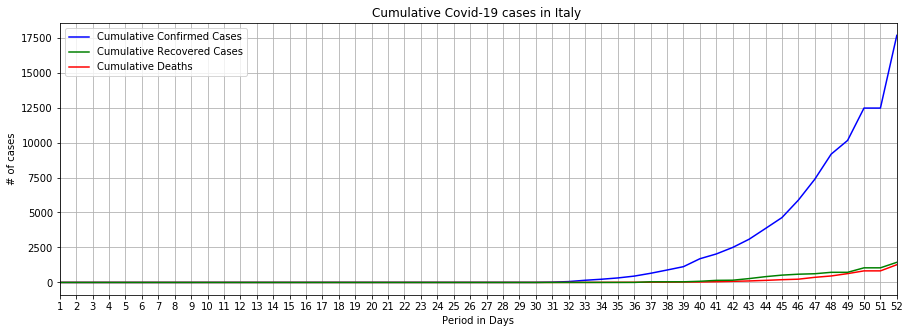

Everyday 339.6 people got infected from first confirmed case (31st Jan 2020) to 13th March 2020.
The rate at which the population got infected from first confirmed case (31st Jan 2020) to 13th March 2020 was 0.02917.
7.17% population suffered death from first confirmed case (31st Jan 2020) to 13th March 2020.
8.15% population recovered from first confirmed case (31st Jan 2020) to 13th March 2020.


In [241]:
plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(italy_df)+1)
tick_locations_italy = []
for x in x_axis:
    tick_locations_italy.append(x)
    
plt.title("Cumulative Covid-19 cases in Italy ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
confirmed_cases_italy, = plt.plot(x_axis, italy_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases")
death_cases_italy, = plt.plot(x_axis, italy_df.loc[:,'#Cumulative Death Cases'], color="red", label="Cumulative Deaths")
recovered_cases_italy, = plt.plot(x_axis, italy_df.loc[:,'#Cumulative Recovered Cases'], color="green", label="Cumulative Recovered Cases")

plt.legend(handles=[confirmed_cases_iran, recovered_cases_iran, death_cases_iran], loc="upper left")
plt.xticks(tick_locations_italy)

plt.show()

print(f"Everyday {speed_infection_italy} people got infected from first confirmed case (31st Jan 2020) to 13th March 2020.")
print(f"The rate at which the population got infected from first confirmed case (31st Jan 2020) to 13th March 2020 was {infection_rate_italy}.")
print(f"{percentage_death_italy}% population suffered death from first confirmed case (31st Jan 2020) to 13th March 2020.")
print(f"{percentage_recovered_italy}% population recovered from first confirmed case (31st Jan 2020) to 13th March 2020.")

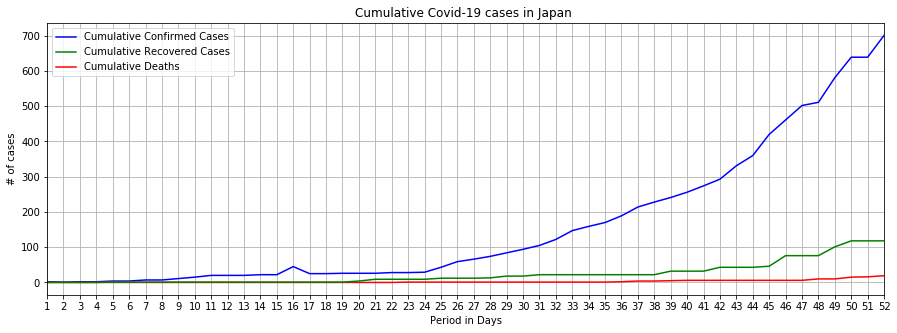

Everyday 13.5 people got infected from first confirmed case (31st Jan 2020) to 13th March 2020.
The rate at which the population got infected from first confirmed case (31st Jan 2020) to 13th March 2020 was 0.00056.
2.71% population suffered death from first confirmed case (31st Jan 2020) to 13th March 2020.
16.83% population recovered from first confirmed case (31st Jan 2020) to 13th March 2020.


In [254]:
plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(japan_df)+1)
tick_locations_japan = []
for x in x_axis:
    tick_locations_japan.append(x)
    
plt.title("Cumulative Covid-19 cases in Japan ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
confirmed_cases_japan, = plt.plot(x_axis, japan_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases")
death_cases_japan, = plt.plot(x_axis, japan_df.loc[:,'#Cumulative Death Cases'], color="red", label="Cumulative Deaths")
recovered_cases_japan, = plt.plot(x_axis, japan_df.loc[:,'#Cumulative Recovered Cases'], color="green", label="Cumulative Recovered Cases")

plt.legend(handles=[confirmed_cases_japan, recovered_cases_japan, death_cases_japan], loc="upper left")
plt.xticks(tick_locations_japan)

plt.show()

print(f"Everyday {speed_infection_japan} people got infected from first confirmed case (31st Jan 2020) to 13th March 2020.")
print(f"The rate at which the population got infected from first confirmed case (31st Jan 2020) to 13th March 2020 was {infection_rate_japan}.")
print(f"{percentage_death_japan}% population suffered death from first confirmed case (31st Jan 2020) to 13th March 2020.")
print(f"{percentage_recovered_japan}% population recovered from first confirmed case (31st Jan 2020) to 13th March 2020.")

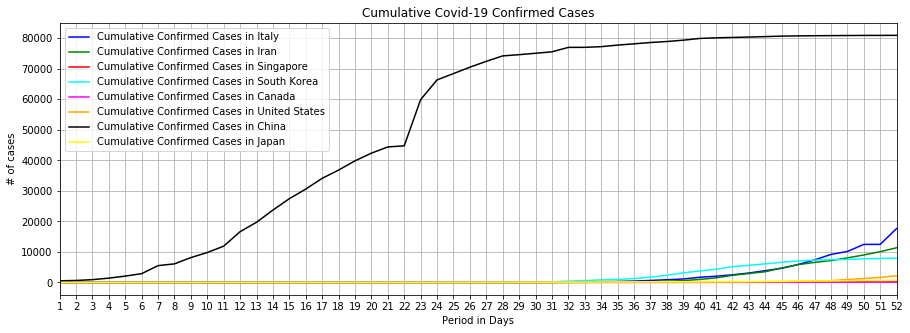

In [258]:
### Merged (CONFIRMED)
###
###

plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(italy_df)+1)
tick_locations_italy = []
for x in x_axis:
    tick_locations_italy.append(x)
    
plt.title("Cumulative Covid-19 Confirmed Cases")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
confirmed_cases_italy, = plt.plot(x_axis, italy_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases in Italy")
confirmed_cases_iran, = plt.plot(x_axis, iran_df.loc[:,'#Cumulative Confirmed Cases'], color="green", label="Cumulative Confirmed Cases in Iran")
confirmed_cases_singapore, = plt.plot(x_axis, singapore_df.loc[:,'#Cumulative Confirmed Cases'], color="red", label="Cumulative Confirmed Cases in Singapore")
confirmed_cases_southKorea, = plt.plot(x_axis, southKorea_df.loc[:,'#Cumulative Confirmed Cases'], color="cyan", label="Cumulative Confirmed Cases in South Korea")
confirmed_cases_canada, = plt.plot(x_axis, canada_df.loc[:,'#Cumulative Confirmed Cases'], color="magenta", label="Cumulative Confirmed Cases in Canada")
confirmed_cases_US, = plt.plot(x_axis, US_df.loc[:,'#Cumulative Confirmed Cases'], color="orange", label="Cumulative Confirmed Cases in United States")
confirmed_cases_china, = plt.plot(x_axis, china_df.loc[:,'#Cumulative Confirmed Cases'], color="black", label="Cumulative Confirmed Cases in China")
confirmed_cases_japan, = plt.plot(x_axis, japan_df.loc[:,'#Cumulative Confirmed Cases'], color="yellow", label="Cumulative Confirmed Cases in Japan")

plt.legend(handles=[confirmed_cases_italy, confirmed_cases_iran, confirmed_cases_singapore,confirmed_cases_southKorea,confirmed_cases_canada,confirmed_cases_US,confirmed_cases_china,confirmed_cases_japan], loc="upper left")
plt.xticks(tick_locations_italy)

plt.show()

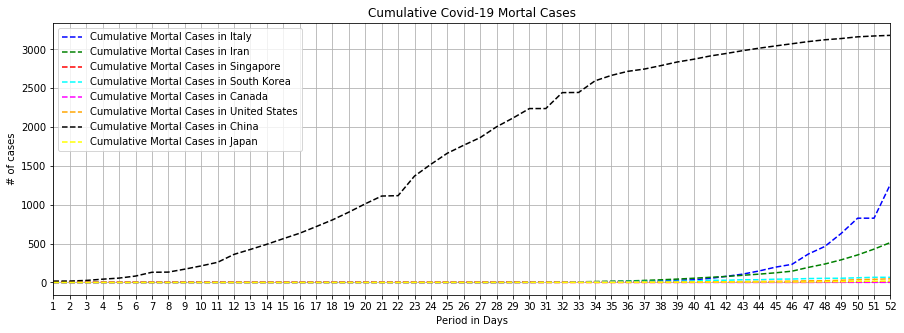

In [259]:
### Merged (DEATHS)
###
###

plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(italy_df)+1)
tick_locations_italy = []
for x in x_axis:
    tick_locations_italy.append(x)
    
plt.title("Cumulative Covid-19 Mortal Cases")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
death_cases_italy, = plt.plot(x_axis, italy_df.loc[:,'#Cumulative Death Cases'], color="blue",linestyle='dashed', label="Cumulative Mortal Cases in Italy")
death_cases_iran, = plt.plot(x_axis, iran_df.loc[:,'#Cumulative Death Cases'], color="green", linestyle='dashed',label="Cumulative Mortal Cases in Iran")
death_cases_singapore, = plt.plot(x_axis, singapore_df.loc[:,'#Cumulative Death Cases'], color="red",linestyle='dashed', label="Cumulative Mortal Cases in Singapore")
death_cases_southKorea, = plt.plot(x_axis, southKorea_df.loc[:,'#Cumulative Death Cases'], color="cyan",linestyle='dashed', label="Cumulative Mortal Cases in South Korea")
death_cases_canada, = plt.plot(x_axis, canada_df.loc[:,'#Cumulative Death Cases'], color="magenta",linestyle='dashed', label="Cumulative Mortal Cases in Canada")
death_cases_US, = plt.plot(x_axis, US_df.loc[:,'#Cumulative Death Cases'], color="orange",linestyle='dashed', label="Cumulative Mortal Cases in United States")
death_cases_china, = plt.plot(x_axis, china_df.loc[:,'#Cumulative Death Cases'], color="black",linestyle='dashed', label="Cumulative Mortal Cases in China")
death_cases_japan, = plt.plot(x_axis, japan_df.loc[:,'#Cumulative Death Cases'], color="yellow",linestyle='dashed', label="Cumulative Mortal Cases in Japan")

plt.legend(handles=[death_cases_italy, death_cases_iran, death_cases_singapore,death_cases_southKorea,death_cases_canada,death_cases_US,death_cases_china,death_cases_japan], loc="upper left")
plt.xticks(tick_locations_italy)

plt.show()

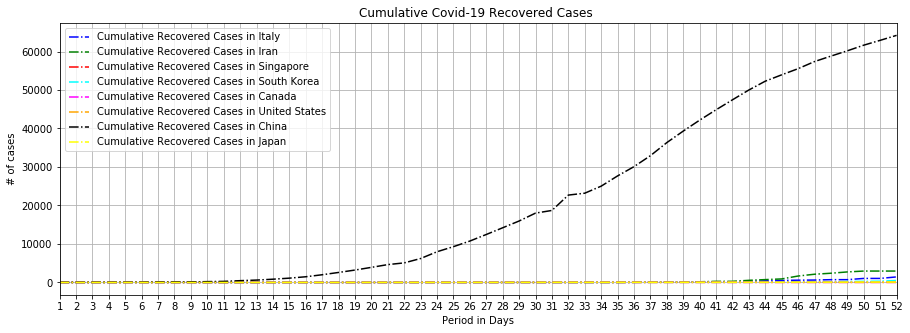

In [260]:
### Merged (DEATHS)
###
###

plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(italy_df)+1)
tick_locations_italy = []
for x in x_axis:
    tick_locations_italy.append(x)
    
plt.title("Cumulative Covid-19 Recovered Cases ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
recovered_cases_italy, = plt.plot(x_axis, italy_df.loc[:,'#Cumulative Recovered Cases'], color="blue",linestyle='dashdot', label="Cumulative Recovered Cases in Italy")
recovered_cases_iran, = plt.plot(x_axis, iran_df.loc[:,'#Cumulative Recovered Cases'], color="green",linestyle='dashdot', label="Cumulative Recovered Cases in Iran")
recovered_cases_singapore, = plt.plot(x_axis, singapore_df.loc[:,'#Cumulative Recovered Cases'], color="red",linestyle='dashdot', label="Cumulative Recovered Cases in Singapore")
recovered_cases_southKorea, = plt.plot(x_axis, southKorea_df.loc[:,'#Cumulative Recovered Cases'], color="cyan",linestyle='dashdot', label="Cumulative Recovered Cases in South Korea")
recovered_cases_canada, = plt.plot(x_axis, canada_df.loc[:,'#Cumulative Recovered Cases'], color="magenta",linestyle='dashdot', label="Cumulative Recovered Cases in Canada")
recovered_cases_US, = plt.plot(x_axis, US_df.loc[:,'#Cumulative Recovered Cases'], color="orange",linestyle='dashdot', label="Cumulative Recovered Cases in United States")
recovered_cases_china, = plt.plot(x_axis, china_df.loc[:,'#Cumulative Recovered Cases'], color="black",linestyle='dashdot', label="Cumulative Recovered Cases in China")
recovered_cases_japan, = plt.plot(x_axis, japan_df.loc[:,'#Cumulative Recovered Cases'], color="yellow", linestyle='dashdot', label="Cumulative Recovered Cases in Japan")

plt.legend(handles=[recovered_cases_italy, recovered_cases_iran, recovered_cases_singapore,recovered_cases_southKorea,recovered_cases_canada,recovered_cases_US,recovered_cases_china,recovered_cases_japan], loc="upper left")
plt.xticks(tick_locations_italy)

plt.show()

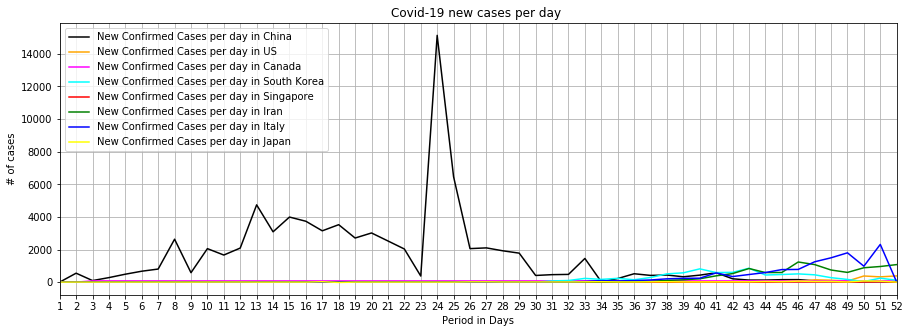

In [262]:
day_china = np.arange(1, len(china_df))
day_US = np.arange(1, len(US_df))
day_canada = np.arange(1, len(canada_df))
day_southKorea = np.arange(1, len(southKorea_df))
day_singapore = np.arange(1, len(singapore_df))
day_iran = np.arange(1, len(iran_df))
day_italy = np.arange(1, len(italy_df))
day_japan = np.arange(1, len(japan_df))

new_cases_perday_china = [0]
new_cases_perday_US = [0]
new_cases_perday_canada = [0]
new_cases_perday_southKorea = [0]
new_cases_perday_singapore = [0]
new_cases_perday_iran = [0]
new_cases_perday_italy = [0]
new_cases_perday_japan = [0]

diff_confirmed_cases_china = china_df.loc[0,"#Cumulative Confirmed Cases"]
diff_confirmed_cases_canada = canada_df.loc[0,"#Cumulative Confirmed Cases"]
diff_confirmed_cases_US = US_df.loc[0,"#Cumulative Confirmed Cases"]
diff_confirmed_cases_singapore = singapore_df.loc[0,"#Cumulative Confirmed Cases"]
diff_confirmed_cases_southKorea = southKorea_df.loc[0,"#Cumulative Confirmed Cases"]
diff_confirmed_cases_italy = italy_df.loc[0,"#Cumulative Confirmed Cases"]
diff_confirmed_cases_iran = iran_df.loc[0,"#Cumulative Confirmed Cases"]
diff_confirmed_cases_japan = japan_df.loc[0,"#Cumulative Confirmed Cases"]

for new_cases in day_china:
    
    new_cases_perday_china.append(diff_confirmed_cases_china)
    diff_confirmed_cases_china = china_df.loc[new_cases,"#Cumulative Confirmed Cases"] - china_df.loc[new_cases-1,"#Cumulative Confirmed Cases"]
for new_cases1 in day_canada:
    
    new_cases_perday_canada.append(diff_confirmed_cases_canada)
    diff_confirmed_cases_canada = canada_df.loc[new_cases,"#Cumulative Confirmed Cases"] - canada_df.loc[new_cases-1,"#Cumulative Confirmed Cases"]
for new_cases2 in day_US:
    
    new_cases_perday_US.append(diff_confirmed_cases_US)
    diff_confirmed_cases_US = US_df.loc[new_cases2,"#Cumulative Confirmed Cases"] - US_df.loc[new_cases2-1,"#Cumulative Confirmed Cases"]

for new_cases3 in day_singapore:
    
    new_cases_perday_singapore.append(diff_confirmed_cases_singapore)
    diff_confirmed_cases_singapore = singapore_df.loc[new_cases3,"#Cumulative Confirmed Cases"] - singapore_df.loc[new_cases3-1,"#Cumulative Confirmed Cases"]

for new_cases4 in day_southKorea:
    
    new_cases_perday_southKorea.append(diff_confirmed_cases_southKorea)
    diff_confirmed_cases_southKorea = southKorea_df.loc[new_cases4,"#Cumulative Confirmed Cases"] - southKorea_df.loc[new_cases4-1,"#Cumulative Confirmed Cases"]

for new_cases5 in day_italy:
    
    new_cases_perday_italy.append(diff_confirmed_cases_italy)
    diff_confirmed_cases_italy = italy_df.loc[new_cases5,"#Cumulative Confirmed Cases"] - italy_df.loc[new_cases5-1,"#Cumulative Confirmed Cases"]

for new_cases6 in day_iran:
    
    new_cases_perday_iran.append(diff_confirmed_cases_iran)
    diff_confirmed_cases_iran = iran_df.loc[new_cases6,"#Cumulative Confirmed Cases"] - iran_df.loc[new_cases6-1,"#Cumulative Confirmed Cases"]
    
for new_cases7 in day_japan:
    
    new_cases_perday_japan.append(diff_confirmed_cases_japan)
    diff_confirmed_cases_japan = japan_df.loc[new_cases7,"#Cumulative Confirmed Cases"] - japan_df.loc[new_cases7-1,"#Cumulative Confirmed Cases"]

#len(new_cases_perday_china)

china_df=pd.DataFrame({"Dates":Confirmed_final.loc["China",:].index.tolist(),\
                       "New cases per day":new_cases_perday_china,\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["China",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["China",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["China",:].tolist()})
US_df=pd.DataFrame({"Dates":Confirmed_final.loc["US",:].index.tolist(),\
                       "New cases per day":new_cases_perday_US,\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["US",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["US",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["US",:].tolist()})
canada_df=pd.DataFrame({"Dates":Confirmed_final.loc["Canada",:].index.tolist(),\
                       "New cases per day":new_cases_perday_canada,\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Canada",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Canada",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Canada",:].tolist()})
southKorea_df=pd.DataFrame({"Dates":Confirmed_final.loc["Korea, South",:].index.tolist(),\
                       "New cases per day":new_cases_perday_southKorea,\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Korea, South",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Korea, South",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Korea, South",:].tolist()})
singapore_df=pd.DataFrame({"Dates":Confirmed_final.loc["Singapore",:].index.tolist(),\
                       "New cases per day":new_cases_perday_singapore,\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Singapore",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Singapore",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Singapore",:].tolist()})
iran_df=pd.DataFrame({"Dates":Confirmed_final.loc["Iran",:].index.tolist(),\
                       "New cases per day":new_cases_perday_iran,\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Iran",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Iran",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Iran",:].tolist()})
italy_df=pd.DataFrame({"Dates":Confirmed_final.loc["Italy",:].index.tolist(),\
                       "New cases per day":new_cases_perday_italy,\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Italy",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Italy",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Italy",:].tolist()})
japan_df=pd.DataFrame({"Dates":Confirmed_final.loc["Japan",:].index.tolist(),\
                       "New cases per day":new_cases_perday_japan,\
                           "#Cumulative Confirmed Cases":Confirmed_final.loc["Japan",:].tolist(),\
                           "#Cumulative Death Cases":Deaths_final.loc["Japan",:].tolist(),
                           "#Cumulative Recovered Cases":Recovered_final.loc["Japan",:].tolist()})
#china_df.head()

plt.figure(figsize=(15,5))
x_axis = np.arange(1, len(china_df)+1)
tick_locations_china = []
for x in x_axis:
    tick_locations_china.append(x)
    
plt.title("Covid-19 new cases per day ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,52)
    
new_cases_perday_china, = plt.plot(x_axis, china_df.loc[:,'New cases per day'], color="black", label="New Confirmed Cases per day in China")
new_cases_perday_US, = plt.plot(x_axis, US_df.loc[:,'New cases per day'], color="orange", label="New Confirmed Cases per day in US")
new_cases_perday_canada, = plt.plot(x_axis, canada_df.loc[:,'New cases per day'], color="magenta", label="New Confirmed Cases per day in Canada")
new_cases_perday_southKorea, = plt.plot(x_axis, southKorea_df.loc[:,'New cases per day'], color="cyan", label="New Confirmed Cases per day in South Korea")
new_cases_perday_singapore, = plt.plot(x_axis, singapore_df.loc[:,'New cases per day'], color="red", label="New Confirmed Cases per day in Singapore")
new_cases_perday_iran, = plt.plot(x_axis, iran_df.loc[:,'New cases per day'], color="green", label="New Confirmed Cases per day in Iran")
new_cases_perday_italy, = plt.plot(x_axis, italy_df.loc[:,'New cases per day'], color="blue", label="New Confirmed Cases per day in Italy")
new_cases_perday_japan, = plt.plot(x_axis, japan_df.loc[:,'New cases per day'], color="yellow", label="New Confirmed Cases per day in Japan")

plt.legend(handles=[new_cases_perday_china,new_cases_perday_US,new_cases_perday_canada,new_cases_perday_southKorea,new_cases_perday_singapore,new_cases_perday_iran,new_cases_perday_italy,new_cases_perday_japan,], loc="upper left")
plt.xticks(tick_locations_china)

plt.show()